# Tutorial de Big Data
## Tutorial 3 - Parte 2

El objetivo es graficar con matplotlib.

Matplotlib es la librería base de graficación, sobre la cual se montan otras librerías. Dentro de Matplotlib, usamos la dependencia "pyplot" que se instala con la librería. Por convención importamos así:

In [22]:
#!pip install matplotlib
import matplotlib.pyplot as plt # importamos la librería gráfica. plt es el nombre por convención que se le asigna

Matplotlib genera los gráficos sobre dos objetos interrelacionados:
- **Figure**: la hoja en blanco, el recuadro que contiene hacia adentro el/los gráfico/s. En términos prácticos esto ocurre detrás de escenas, pero es lo que permite dibujar el gráfico.
- **Axes**: el gráfico en sí, los ejes y la informacíon graficada. La representación de la información sobre ejes.

Las partes de un gráfico
<img src="https://matplotlib.org/stable/_images/anatomy.png"
     width=500/>

Hay esencialmente dos maneras de graficar con Matplotlib:
- **Estilo pyplot**: simple y rápida para figuras que no son muy avanzadas. Quizás más fácil para empezar.
- **Estilo orientado-objetos**: un poco más complejo pero necesario para figuras que requieren mucha customización.

En cuanto al resultado estético, con ambos se puede lograr la misma calidad. Para dar los primeros pasos es indistinto cual se use. Sin embargo, el estilo orientado a objetos es necesario para figuras más complejas donde hay varios gráficos (subplots) y es necesario definir parámetros distintos para cada par de ejes (2D)

### Graficar con matplotlib

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
import os
os.chdir("/Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIGDATA/TUTORIALES/CLASES/T03")

In [25]:
# Abrimos el archivo de potencia energética instalada en el país
df = pd.read_excel("potencia_instalada.xlsx")
# exploren la base

In [26]:
# Agregamos (collapse) a nivel de tipo de fuente
df_fuente = df.groupby(by=["periodo","fuente_generacion"]).agg({"potencia_instalada_mw":"sum"})
df_fuente.reset_index(inplace=True)
df_fuente.sample(5)

,periodo,fuente_generacion,potencia_instalada_mw
50,2016-10-01,Renovable,700.390
122,2018-04-01,Renovable,753.805
149,2019-04-01,Nuclear,1755.000
37,2016-07-01,Nuclear,1755.000
97,2017-10-01,Nuclear,1755.000


In [27]:
df_fuente.shape

(152, 3)

Vamos a graficar dos líneas, así que definimos vector X e Y para cada una. Vamos a graficar la potencia instalada de generación por fuente Renovable y fuente Térmica:

In [28]:
# Definimos  vectores  de datos  para  serie 1 (renovable)
y1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["potencia_instalada_mw"]
x1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["periodo"]
# Definimos  vectores  de datos  para  serie 2 (térmica)
y2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["potencia_instalada_mw"]
x2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["periodo"]

# Nota: df[condicion][columna] selecciona la "columna" de la base que resulta de aplicar el filtro df[condicion].

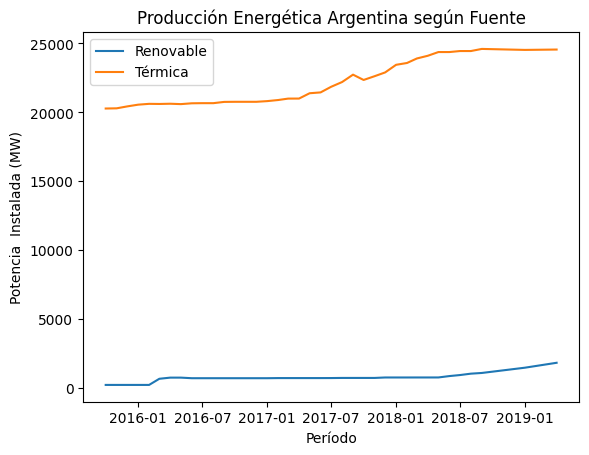

In [29]:
# Creamos el gráfico al estilo pyplot

plt.plot(x1, y1, label="Renovable") # serie 1
plt.plot(x2, y2, label="Térmica") # serie 2
# Estas  dos  líneas  estaran  sobre  el mismo  gráfico

# Modifico  labels
plt.xlabel("Período")
plt.ylabel("Potencia  Instalada (MW)")
plt.title("Producción Energética Argentina según Fuente")

# Agrego  leyenda
plt.legend()
plt.show() #esto es necesario para visualizar

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_17689/2882315964.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


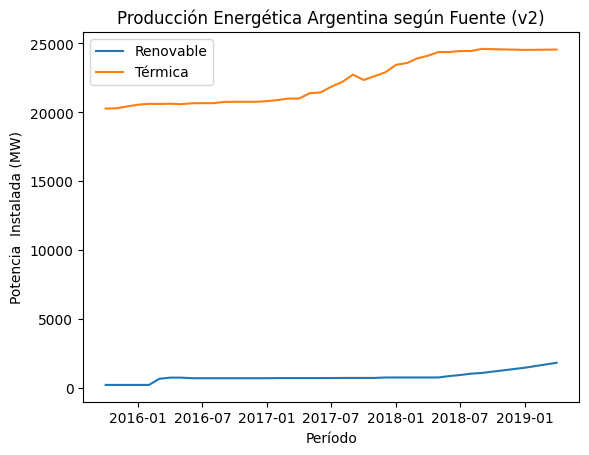

In [30]:
# Creamos el gráfico al estilo OO

# Creamos la figura y los axes
fig, ax = plt.subplots() # crear objetos

# Definimos series
ax.plot(x1, y1, label="Renovable") # Serie 
ax.plot(x2, y2, label="Térmica") # Serie 2

# Modificamos labels y título
ax.set_xlabel("Período")
ax.set_ylabel("Potencia  Instalada (MW)")
ax.set_title("Producción Energética Argentina según Fuente (v2)")

# Agregamos leyenda
ax.legend()
fig.show()

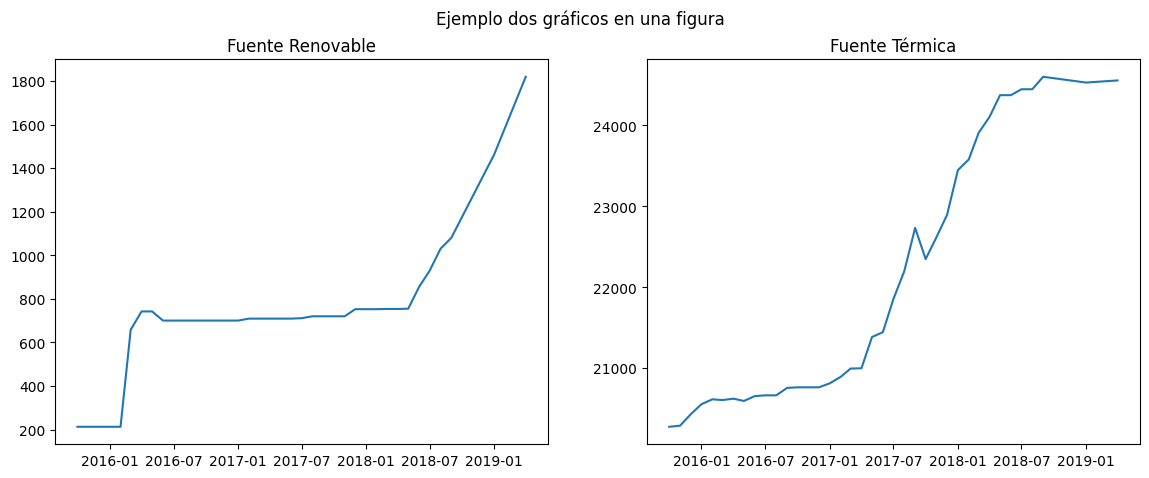

In [31]:
# Graficar múltiples gráficos estilo pyplot

# ejemplo 2 ax en un fig
plt.figure(figsize=(14, 5))

# Definimos primer gráfico
plt.subplot(121) # subplot(nrows, ncols, index, **kwargs) donde nrows=1, ncols=2, index=1
plt.plot(x1, y1)
plt.title("Fuente Renovable")

# Definimos segundo gráfico
plt.subplot(122)
plt.plot(x2, y2)
plt.title("Fuente Térmica")

# Definimos título general de la figura
plt.suptitle("Ejemplo dos gráficos en una figura")
plt.show()

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_17689/4073155617.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


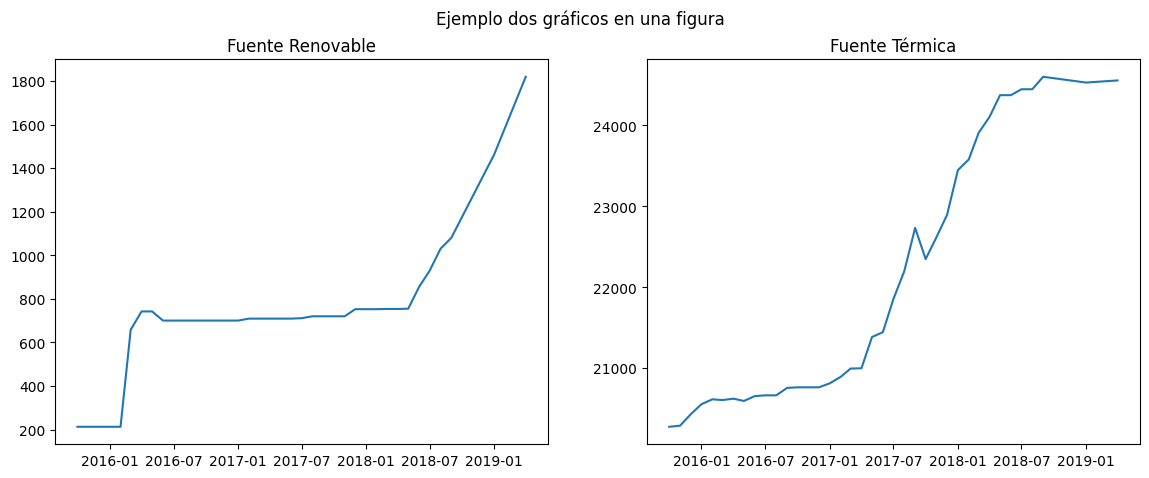

In [32]:
# Graficar múltiples gráficos estilo O-O

# ejemplo 2 ax en un fig
fig, ax = plt.subplots(figsize=(14, 5), ncols=2, nrows=1)

# Definimos primer gráfico
ax[0].plot(x1, y1)
ax[0].set_title("Fuente Renovable")

# Definimos segundo gráfico
ax[1].plot(x2, y2)
ax[1].set_title("Fuente Térmica")

# Definimos título general de la figura
fig.suptitle("Ejemplo dos gráficos en una figura")
fig.show()

### Otro ejemplo usando API de WB

Pueden ver la documentación [acá](https://wbdata.readthedocs.io/en/stable/)

In [37]:
#!pip install wbdata
import wbdata
import pandas as pd
help(wbdata)

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    /Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIGDATA/TUTORIALES/.venv/lib/python3.12/site-packages/wbdata/__init__.py




In [35]:
# Podemos ver todos los datos disponibles
# wbdata.get_source()

In [36]:
# Para este ejemplo vamos a usar source 14: indicadores de género
wbdata.get_indicator(source=14)

AttributeError: module 'wbdata' has no attribute 'get_indicator'

In [ ]:
wbdata.search_indicators("scores") 

In [ ]:
indicadores = {'HD.HCI.HLOS.FE':'scores_edu_fem','HD.HCI.HLOS.MA':'scores_edu_masc'}
#HD.HCI.HLOS.FE                   Harmonized Test Scores, Female
#HD.HCI.HLOS.MA                   Harmonized Test Scores, Male
data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [ ]:
df.head()

In [ ]:
df

In [ ]:
ax = df.plot(kind='bar', title='Puntaje en educación')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.legend(["Mujeres","Varones"])
# Acá estamos usando el index del df como xticklabels

Ahora buscamos hacer un gráfico solo con datos del año 2020

In [ ]:
# Dejamos índice como columnas
df.reset_index(inplace=True)
df

In [ ]:
print(df["date"].dtype) # no es numérica
df_2020 = df[df["date"]=="2020"]
df_2020

In [ ]:
df_2020 = df_2020.set_index(["country", "date"])
df_2020

In [ ]:
# Graficamos
ax = df_2020.plot(kind='bar', title='Puntaje en educación')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.tick_params(axis="x", rotation=0)
ax.legend(["Mujeres","Varones"])

### Gráficos con ipywidgets

Los widgets en Python son objetos que tienen una representación en el navegador. Por ejemplo, los widgets pueden tener forma de una caja de texto, un desplegable, una casilla de verificación, etc.
Más info sobre ipywidgets [acá](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html)

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import datetime

In [ ]:
lista_fuentes = list(set(df_fuente['fuente_generacion']))
lista_fuentes

['Térmica', 'Renovable', 'Nuclear', 'Hidráulica']

In [44]:
# Seleccionar tipo de fuente
print("Seleccionar Fuente:")
fuente = widgets.Dropdown(
    options=['Nuclear','Renovable',  'Hidráulica', 'Térmica'],
    value='Nuclear', # "Nuclear" es la opción seleccionada de forma predeterminada cuando se crea el widget
    description='Fuente:',
    disabled=False # widget activo. si disabled=True, el widget se vuelve inactivo y el usuario no puede interactuar con él.
)
display(fuente) # Muestra el widget

Seleccionar Fuente:


Dropdown(description='Fuente:', options=('Nuclear', 'Renovable', 'Hidráulica', 'Térmica'), value='Nuclear')

In [ ]:
fechas = list(set(df_fuente['periodo'].dt.strftime("%y-%m"))) 
# set para eliminar duplicados
# strftime() para formatear la fechas en un string según un formato deseado. 
# "%y-%m" formato tal que se muestren los últimos dos dígitos del año (%y) seguidos por el mes (%m).
fechas.sort()
fechas

['15-10',
 '15-11',
 '15-12',
 '16-01',
 '16-02',
 '16-03',
 '16-04',
 '16-05',
 '16-06',
 '16-07',
 '16-08',
 '16-09',
 '16-10',
 '16-11',
 '16-12',
 '17-01',
 '17-02',
 '17-03',
 '17-04',
 '17-05',
 '17-06',
 '17-07',
 '17-08',
 '17-09',
 '17-10',
 '17-11',
 '17-12',
 '18-01',
 '18-02',
 '18-03',
 '18-04',
 '18-05',
 '18-06',
 '18-07',
 '18-08',
 '18-09',
 '19-01',
 '19-04']

In [39]:
select_fecha = widgets.SelectionRangeSlider(
    options=fechas,
    index=(0, len(fechas)-1),
    description='Fechas',
    disabled=False
)
display(select_fecha)

SelectionRangeSlider(description='Fechas', index=(0, 37), options=('15-10', '15-11', '15-12', '16-01', '16-02'…

In [52]:
# Probamos si los valores quedaron actualizados
# Para usar los valores definidos usamos .value

print("El rango de fechas a usar es: ", select_fecha.value)
print("La fuente a mostrar es: ", fuente.value)

El rango de fechas a usar es:  ('15-10', '16-08')
La fuente a mostrar es:  Térmica


Evolución de la potencia instalada de fuente: Térmica


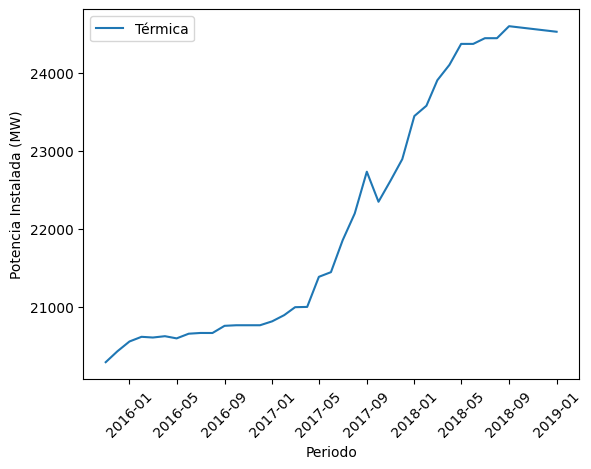

In [49]:
# Creamos un dataframe con la selección de filas de la fuente elegida
df_temp =  df_fuente[df_fuente['fuente_generacion'] == fuente.value]

# Extraemos el objeto fecha del string creado a partir del widget
fecha_min = datetime.datetime.strptime(select_fecha.value[0], "%y-%m") 
fecha_max = datetime.datetime.strptime(select_fecha.value[1], "%y-%m")
# con el módulo datetime y su función strptime creamos un objeto datetime (que contiene info de date y time)

# Filtramos según fechas elegidas
df_temp = df_temp[(df_temp['periodo']>fecha_min)&(df_temp['periodo']<fecha_max)]

print("Evolución de la potencia instalada de fuente: {}".format(fuente.value))
# Creamos el grafico
plt.plot(df_temp['periodo'], df_temp['potencia_instalada_mw'], label=fuente.value) 
# Modificamos labels
plt.xlabel('Periodo')
plt.xticks(rotation=45)
plt.ylabel('Potencia Instalada (MW)')

# Agregamos leyenda
plt.legend()
plt.show()